In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importar librerías y modelo de regresión lineal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
url= "https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv"
df=pd.read_csv(url, sep=",")
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.set_index('Customer Id', inplace = True)
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)#Borrar columna unnamed
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [7]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
df.dropna(inplace = True)#borrar faltantes

#Kmeans

In [24]:
#impotar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [25]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [27]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_sc)
  silhouette_scores.append(silhouette_score(df_sc, kmeans.labels_))

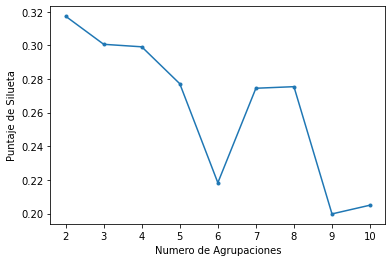

In [29]:
#visuzlización de scores
plt.plot(range(2, 11), siluetas, marker = '.');
plt.xlabel('Numero de Agrupaciones');
plt.ylabel('Puntaje de Silueta');

In [31]:
#instanciar KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_sc)


KMeans(n_clusters=2)

In [33]:
#guardar labels
df['Kmeans Clusters'] = kmeans.labels_

#Agrupación jerárquica

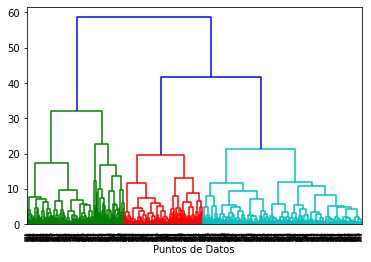

In [35]:
#Visualización Dendrogram
sch.dendrogram(sch.linkage(df_sc, method = 'ward'));
plt.xlabel('Puntos de Datos');

In [37]:
#Instanciar con 3 clusters
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(df_sc)


AgglomerativeClustering(n_clusters=3)

In [39]:
#guardar los labels
df['HC Clusters'] = hc.labels_

#DBSCAN

In [42]:
#Instanciar y ajustar
dbs = DBSCAN(eps=0.5, min_samples=5).fit(df_sc)

In [44]:
#Guardar labels
df['DBS Clusters'] = dbs.labels_

#Parte 2

In [45]:
silhouette_score(df_sc, df['Kmeans Clusters'])

0.3173340283577065

In [46]:
silhouette_score(df_sc, df['HC Clusters'])

0.2852618297522245

In [47]:
silhouette_score(df_sc, df['DBS Clusters'])

-0.296966225707572

In [ ]:
#el mejor modelo es el KMeans debido a que tiene un mejor score 